In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("veriler/merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


* **year:** Arabanın üretim yılı
* **price:** Arabanın fiyatı 
* **transmission:** Arabanın vitesi 
* **mileage:** Arabanın kilometresi
* **tax:** Arabanın vergisi
* **mpg:** Araba kilometrede kaç yakıyor
* **engineSize:** Arabanın motor kuvveti

# Veriyi Anlamak

In [3]:
# İlk olarak verinin describe istatistiğine bakalım:

dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [4]:
# Verimizde Null veri varmı onu analiz edelim ve bu Null değerleri ya silelim ya da ortalama bir değer yerine koyalım.

#İlk başta Null verilere bakalım
dataFrame.isnull()

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [5]:
dataFrame.isnull().sum() # fonksiyonumuzun sonuna .sum() diyerek hangi sütunda kaç null değeri var görebiliriz.

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

# Grafiksel Analizler

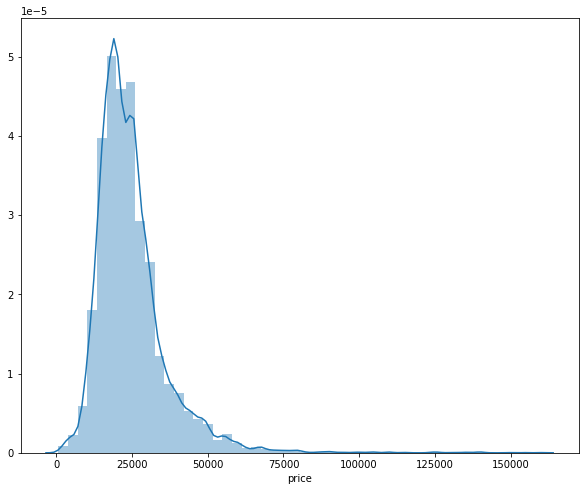

In [6]:
plt.figure(figsize=(10,8)) # Grafiğin büyüklüğünü ayarlıyoruz.
sbn.distplot(dataFrame["price"]) # Dağılıma göre grafiğini çıkarıyorum.

**Grafikte de görüldüğü gibi 75000'den sonra grafiği bozan veriler var, yüksek veriler var bu veriler bizim yapımızı bozabilir. Az olan yüksek fiyatlardan dolayı tahmin değerlerimiz normalden yüksek çıkabilir ve doğru bir sonuç elde edemeyebiliriz. Bu sorunun ortadan kalkmasını istiyorsak 100.000'den sonraki verileri çıkartabiliriz ve daha iyi bir dataset olmuş olur.**

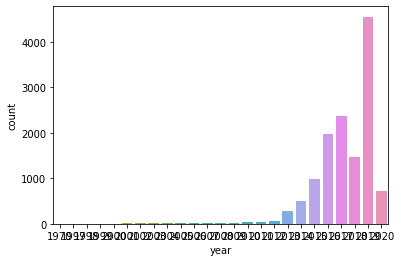

In [7]:
# Yıllara göre araba dağılımı yapalım:

sbn.countplot(dataFrame["year"]) # kaç adet olduğunu gösteren dağılım grafiği

In [8]:
# Veilerin birbirleri arasındaki korelasyon'a bakalım:

dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

**correlation matrisine baktığımız zaman fiyatı en çok pozitif etkileyen değerin yıl olduğunu görüyoruz, yıl arttıkça fiyat artıyor.**

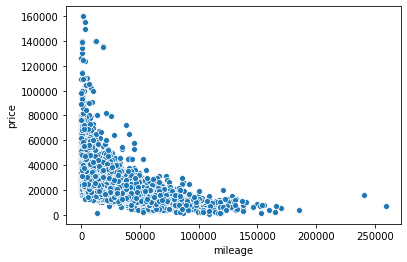

In [10]:
# Verilerin dağılım grafiğini de çıkartalım

sbn.scatterplot(x="mileage", y="price", data= dataFrame)

**Grafik beklendiği gibi çıktı; Arabanın kilometresi arttıkça fiyattın düştüğünü görüyoruz.**

In [11]:
# En yüksek fiyatlı arabaları görelim:

dataFrame.sort_values("price", ascending= False).head(20) # assendic = False yapmamızın nedeni fiyatı yukarıdan aşağıya azalan bir modelle karşımıza çıkaracak, değeri True yaparsak tam tersi olur.

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
dataFrame.sort_values("price", ascending= True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [13]:
len(dataFrame)

13119

# Veri Temizliği

**Verimizin %99'unu kullansak sıkıntımız olmaz, bunun için en yüksek verileri çıkartalım**

In [14]:
len(dataFrame) * 0.01

131.19

In [15]:
# en yüksek 131 araba verimizi çıkartalım o halde

yuzdeDoksanDokuzDf = dataFrame.sort_values("price", ascending= False).iloc[131:]

In [16]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


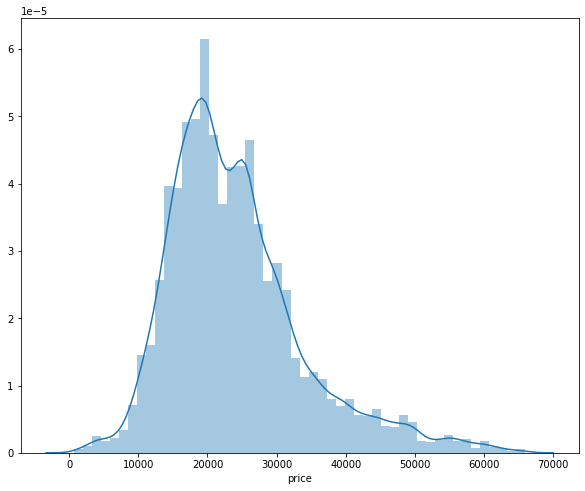

In [17]:
plt.figure(figsize=(10,8))
sbn .distplot(yuzdeDoksanDokuzDf["price"])

**Veriyi biraz daha düzeltmiş olduk ve verinin %99'u halen elimizde yani bizim için büyük bir kayıp olmadı.**

In [18]:
# Şimdi yıllara göre gruplayıp bu grubun ortalamasını alalım:

dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [19]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

**1970 yılında olan veriler çok absürt gibi durduğu için bu veriyi de çıkartalım veri setimizin içerisinden.**

In [20]:
# 1970'i çıkartıyoruz:

dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [21]:
dataFrame = yuzdeDoksanDokuzDf
dataFrame = dataFrame[dataFrame.year != 1970]

In [22]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [23]:
# transmission değeri var ve bu numeric değil bunu çıkartalım

dataFrame = dataFrame.drop("transmission", axis=1)

# Model Oluşturmak

In [24]:
y = dataFrame["price"].values # Bağımlı değişken - fiyat
x = dataFrame.drop("price", axis=1).values # Bağımsız değişkenler - fiyat harici diğerleri

In [25]:
# train - test verilerimizi ayarlıyoruz

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [26]:
len(x_train)

9090

In [27]:
len(x_test)

3897

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
from tensorflow.keras.models import Sequential   # Modelimizi oluşturmak için çağırdığımız kütüphane
from tensorflow.keras.layers import Dense # Katmanları oluşturmak için çağırdığımız kütüphane

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [30]:
x_train.shape

(9090, 5)

In [31]:
# Modeli oluşturalım

model = Sequential() # Modeli oluşturduk

# Modelimizin 4 gizli katmanı olmasını istiyorum ve her katmanda 12 adet nöron olsun:
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1)) # Çıkış katmanı da oluşturduk

model.compile(optimizer="adam", loss="mse")

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
# Validation_data ile doğruluk oranımızı alıyoruz.
model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size = 250, epochs=300) 

Instructions for updating:
Use tf.cast instead.
Train on 9090 samples, validate on 3897 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
9090/9090 [==============================] - 0s 37us/sample - loss: 672131952.7217 - val_loss: 688079130.8678
Epoch 2/300
9090/9090 [==============================] - 0s 10us/sample - loss: 672080408.0088 - val_loss: 687991517.9718
Epoch 3/300
9090/9090 [==============================] - 0s 6us/sample - loss: 671930639.3487 - val_loss: 687744067.1532
Epoch 4/300
9090/9090 [==============================] - 0s 6us/sample - loss: 671523402.3498 - val_loss: 687082552.7575
Epoch 5/300
9090/9090 [==============================] - 0s 6us/sample - loss: 670459035.8812 - val_loss: 685400119.3616
Epoch 6/300
9090/9090 [==============================] - 0s 6us/sample - loss: 667911478.2134 - val_loss: 681587081.6074
Epoch 7/300
9090/9090 [==============================] - 0s 6us/sample - loss: 662497666.3234 - val_loss: 673895722.7159
Epoch 8

9090/9090 [==============================] - 0s 5us/sample - loss: 28846870.5127 - val_loss: 29581842.7827
Epoch 133/300
9090/9090 [==============================] - 0s 5us/sample - loss: 28341473.0297 - val_loss: 29128177.3108
Epoch 134/300
9090/9090 [==============================] - 0s 5us/sample - loss: 27926689.4895 - val_loss: 28677082.2561
Epoch 135/300
9090/9090 [==============================] - 0s 6us/sample - loss: 27443534.6997 - val_loss: 28231833.6028
Epoch 136/300
9090/9090 [==============================] - 0s 5us/sample - loss: 27011300.1386 - val_loss: 27815698.7436
Epoch 137/300
9090/9090 [==============================] - 0s 5us/sample - loss: 26592109.3949 - val_loss: 27394153.7803
Epoch 138/300
9090/9090 [==============================] - 0s 5us/sample - loss: 26161026.6920 - val_loss: 27000401.7393
Epoch 139/300
9090/9090 [==============================] - 0s 6us/sample - loss: 25771222.9725 - val_loss: 26671915.5494
Epoch 140/300
9090/9090 [=====================

Epoch 200/300
9090/9090 [==============================] - 0s 5us/sample - loss: 19962473.0737 - val_loss: 21432030.6549
Epoch 201/300
9090/9090 [==============================] - 0s 6us/sample - loss: 19951309.3839 - val_loss: 21394240.6069
Epoch 202/300
9090/9090 [==============================] - 0s 6us/sample - loss: 19878378.1056 - val_loss: 21364720.1919
Epoch 203/300
9090/9090 [==============================] - 0s 5us/sample - loss: 19842579.8911 - val_loss: 21337582.8950
Epoch 204/300
9090/9090 [==============================] - 0s 5us/sample - loss: 19817061.2640 - val_loss: 21312044.7324
Epoch 205/300
9090/9090 [==============================] - 0s 5us/sample - loss: 19785665.0066 - val_loss: 21277307.8614
Epoch 206/300
9090/9090 [==============================] - 0s 5us/sample - loss: 19742763.8801 - val_loss: 21243486.9746
Epoch 207/300
9090/9090 [==============================] - 0s 6us/sample - loss: 19708164.1177 - val_loss: 21203315.3585
Epoch 208/300
9090/9090 [=======

**val_loss ile doğrulama kayıplarını da burada görebiliyoruz.**

# Sonuçları Değerlendirmek

In [33]:
# Hem normal kayıp hem de doğrulama kayıplarını görelim.

kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.head()

,loss,val_loss
0,6.721320e+08,6.880791e+08
1,6.720804e+08,6.879915e+08
2,6.719306e+08,6.877441e+08
3,6.715234e+08,6.870826e+08
4,6.704590e+08,6.854001e+08


**Normal Kayıp ve Doğrulama Kayıplarını kıyaslayalım:**

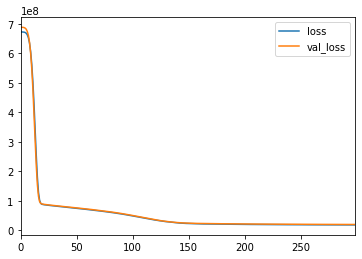

In [34]:
kayipVerisi.plot()

Burada önemli olan kayıpların birbirini takip etmesi yani birbirine yakın olması

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
tahminDizisi = model.predict(x_test)
tahminDizisi

array([[22987.195],
       [23530.885],
       [25094.48 ],
       ...,
       [26393.863],
       [14474.831],
       [24913.014]], dtype=float32)

In [37]:
mean_absolute_error(y_test,tahminDizisi)  # absolute farka bakalım

3188.8374891117164

In [38]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


**Burada ortalama fiyata bakıyoruz ve ortalama fiyat 24.074, bizim sapma değerimiz ise 3.244. Bu değerlere baktığımızda yaklaşık %13'lük bir sapma var ve bu sapmanın satıcıya göre durumu nedir bunu değerlendirmek lazım. Bu değeri daha da düşürmek istiyorsak, veri temizliği, model içerisinde optimizasyonlar yaparak daha düşük bir sapma değerine ulaşabiliriz.**

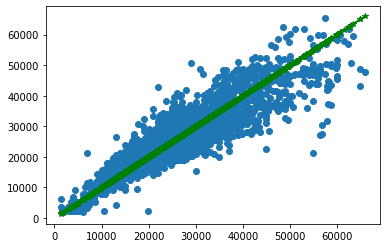

In [39]:
# y_test ile tahminlerimizi karşılaştıralım:

plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [40]:
# verimizin içinden bir veri ile modelimizi test edelim ve bu teste bakarak sapma değerini bulalım

dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [41]:
yeniAraba = dataFrame.drop("price", axis=1).iloc[2]
yeniAraba

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

**Yeni arabayı tahmin edelim:**

In [42]:
# önce scale edelim
yeniAraba = scaler.transform(yeniAraba.values.reshape(-1,5))   # reshape yapmamızın nedeni dizimizi 2D yapıyoruz.
# sonra tahmin edelim
model.predict(yeniAraba)

array([[60625.758]], dtype=float32)